In [30]:
print("""
PassengerId: Identificador único para cada passageiro.
Survived: Variável alvo que indica se o passageiro sobreviveu (1) ou não (0).
Pclass: Classe do bilhete (1ª, 2ª ou 3ª).
Name: Nome completo do passageiro.
Sex: Gênero do passageiro.
Age: Idade do passageiro em anos.
SibSp: Número de irmãos ou cônjuges a bordo do Titanic.
Parch: Número de pais ou filhos a bordo do Titanic.
Fare: Tarifa do bilhete.
Cabin: Número da cabine onde o passageiro ficou.
Embarked: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).
FamilySize: Tamanho total da família (incluindo o passageiro).
AgeGroup_Infant, AgeGroup_Child, AgeGroup_Teenager, AgeGroup_Young Adult, AgeGroup_Adult, AgeGroup_Middle-aged, AgeGroup_Senior: Categorias de grupo etário.
FareGroup_Low, FareGroup_Medium, FareGroup_High, FareGroup_Very High: Categorias de tarifa.
IsAlone: Indica se o passageiro estava viajando sozinho.
Deck_A, Deck_B, Deck_C, Deck_D, Deck_E, Deck_F, Deck_G, Deck_T, Deck_Unknown: Presença do passageiro em decks específicos.
Companions: Número de acompanhantes a bordo.
Survived_Class: Classificação baseada nas taxas de sobrevivência.
Title: Título do passageiro (ex.: Mr, Mrs, Miss).
IsMarried: Estado civil do passageiro.
Deck_Unknown: Indica informações desconhecidas sobre o deck.
""")



PassengerId: Identificador único para cada passageiro.
Survived: Variável alvo que indica se o passageiro sobreviveu (1) ou não (0).
Pclass: Classe do bilhete (1ª, 2ª ou 3ª).
Name: Nome completo do passageiro.
Sex: Gênero do passageiro.
Age: Idade do passageiro em anos.
SibSp: Número de irmãos ou cônjuges a bordo do Titanic.
Parch: Número de pais ou filhos a bordo do Titanic.
Fare: Tarifa do bilhete.
Cabin: Número da cabine onde o passageiro ficou.
Embarked: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).
FamilySize: Tamanho total da família (incluindo o passageiro).
AgeGroup_Infant, AgeGroup_Child, AgeGroup_Teenager, AgeGroup_Young Adult, AgeGroup_Adult, AgeGroup_Middle-aged, AgeGroup_Senior: Categorias de grupo etário.
FareGroup_Low, FareGroup_Medium, FareGroup_High, FareGroup_Very High: Categorias de tarifa.
IsAlone: Indica se o passageiro estava viajando sozinho.
Deck_A, Deck_B, Deck_C, Deck_D, Deck_E, Deck_F, Deck_G, Deck_T, Deck_Unknown: Presença do passageir

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

df = pd.read_csv(r"D:\4 SEMESTRE\IA\aula\titanic_detailed.csv",sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           601 non-null    int64  
 1   Survived              601 non-null    int64  
 2   Pclass                601 non-null    int64  
 3   Name                  601 non-null    object 
 4   Sex                   601 non-null    object 
 5   Age                   601 non-null    float64
 6   SibSp                 601 non-null    int64  
 7   Parch                 601 non-null    int64  
 8   Fare                  601 non-null    float64
 9   Cabin                 274 non-null    object 
 10  Embarked              601 non-null    object 
 11  FamilySize            601 non-null    int64  
 12  AgeGroup_Infant       601 non-null    bool   
 13  AgeGroup_Child        601 non-null    bool   
 14  AgeGroup_Teenager     601 non-null    bool   
 15  AgeGroup_Young Adult  6

In [32]:
survived_values = df['Survived'].value_counts()
print(f'\nContagem completa:\n{survived_values}')


Contagem completa:
Survived
0    326
1    275
Name: count, dtype: int64


C:\Users\aluno8\AppData\Local\Temp\ipykernel_1360\2344067523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df,palette='coolwarm')


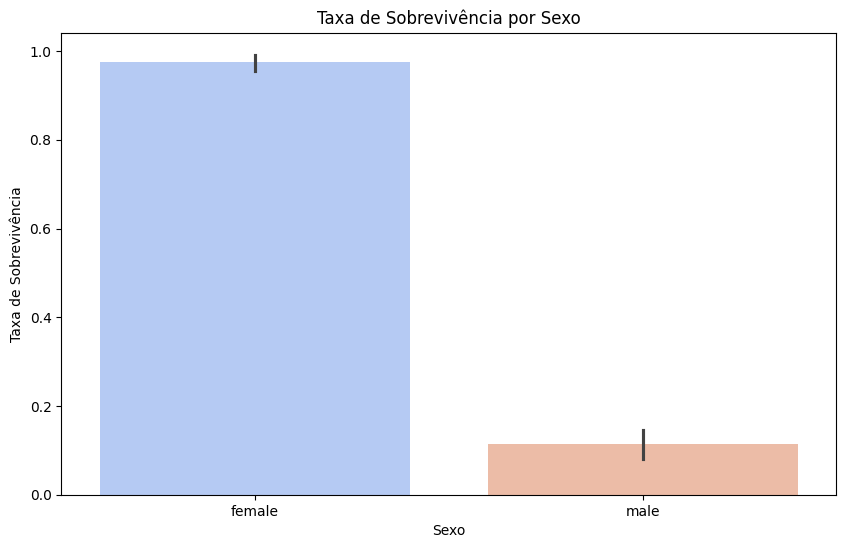

In [33]:
# Taxa de sobrevivência por sexo
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df,palette='coolwarm')
plt.title('Taxa de Sobrevivência por Sexo')
plt.ylabel('Taxa de Sobrevivência')
plt.xlabel('Sexo')
plt.show()


C:\Users\aluno8\AppData\Local\Temp\ipykernel_1360\3152546002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='coolwarm')


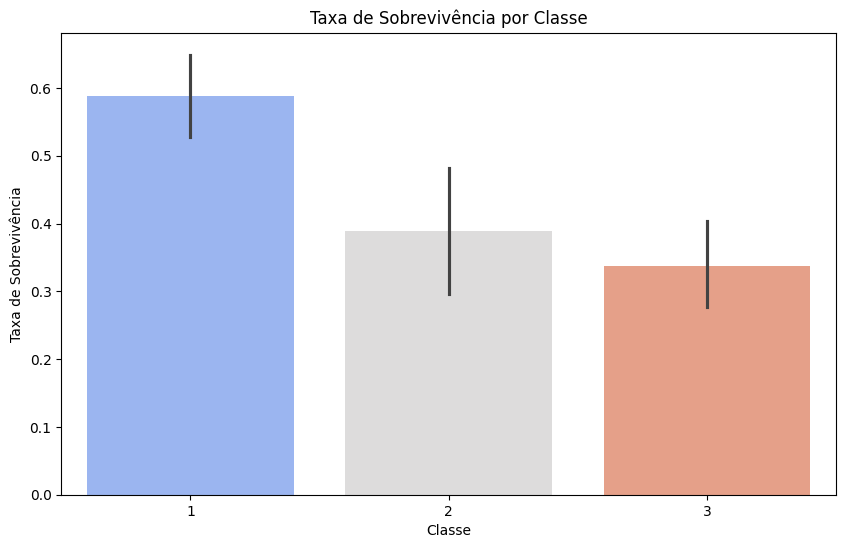

In [34]:
# Taxa de sobrevivência por classe
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df, palette='coolwarm')
plt.title('Taxa de Sobrevivência por Classe')
plt.ylabel('Taxa de Sobrevivência')
plt.xlabel('Classe')
plt.show()


C:\Users\aluno8\AppData\Local\Temp\ipykernel_1360\1634788761.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=df_age_groups, palette='coolwarm')


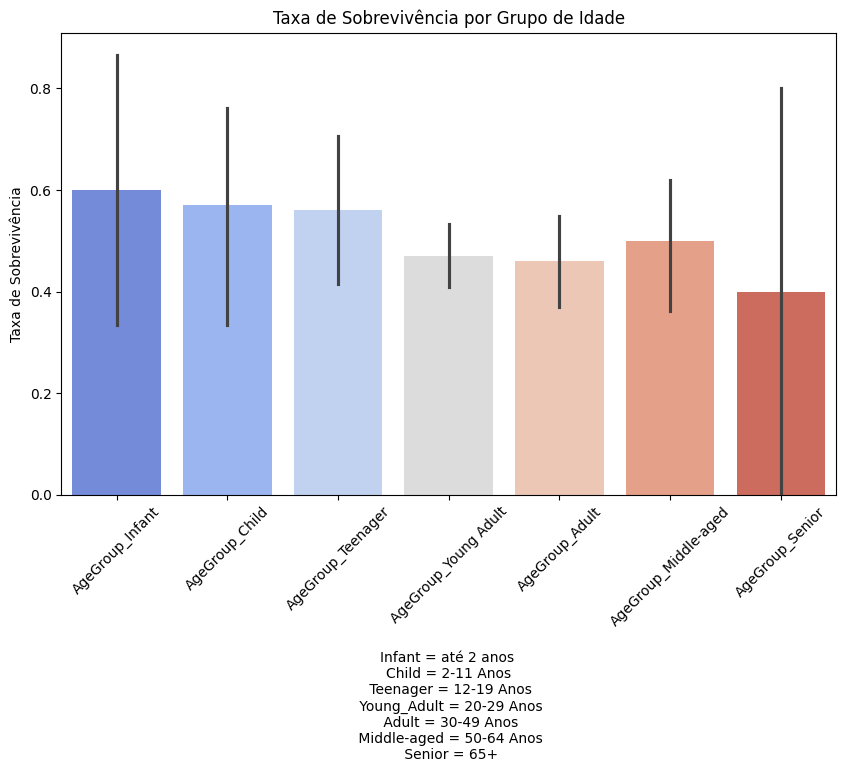

In [35]:
# Preparação dos dados para o gráfico por grupo de idade
age_group_columns = [col for col in df.columns if 'AgeGroup_' in col]
df_age_groups = df.melt(id_vars=['Survived'], value_vars=age_group_columns, var_name='AgeGroup', value_name='InGroup')
df_age_groups = df_age_groups[df_age_groups['InGroup'] == True]

# Taxa de sobrevivência por grupo de idade
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df_age_groups, palette='coolwarm')
plt.title('Taxa de Sobrevivência por Grupo de Idade')
plt.ylabel('Taxa de Sobrevivência')
plt.xlabel('\nInfant = até 2 anos \nChild = 2-11 Anos\n Teenager = 12-19 Anos\n Young_Adult = 20-29 Anos\n Adult = 30-49 Anos\n Middle-aged = 50-64 Anos\n Senior = 65+')
plt.xticks(rotation=45)
plt.show()


C:\Users\aluno8\AppData\Local\Temp\ipykernel_1360\1880868021.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deck', y='Survived', data=df_Decks, palette='coolwarm')


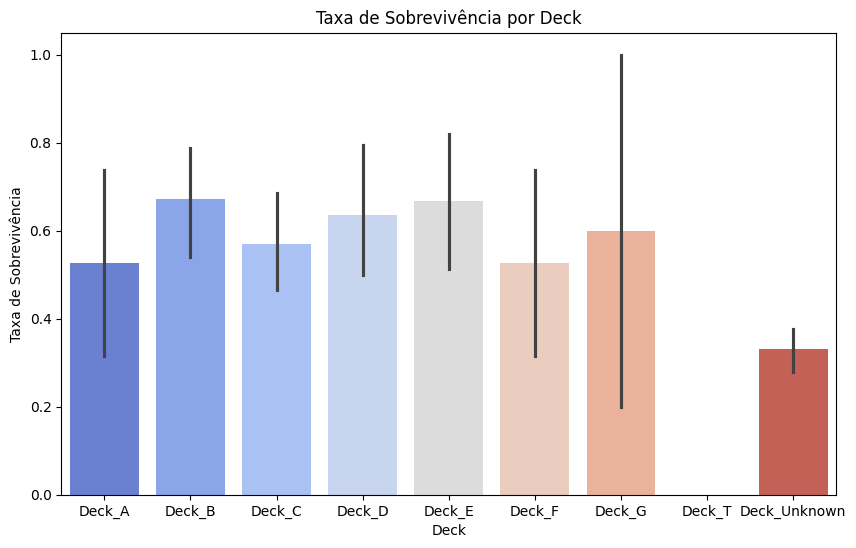

In [36]:
# Preparação dos dados para o gráfico por grupo de idade
age_group_columns = [col for col in df.columns if 'Deck_' in col]
df_Decks = df.melt(id_vars=['Survived'], value_vars=age_group_columns, var_name='Deck', value_name='InGroup')
df_Decks = df_Decks[df_Decks['InGroup'] == True]

# Taxa de sobrevivência por grupo de idade
plt.figure(figsize=(10, 6))
sns.barplot(x='Deck', y='Survived', data=df_Decks, palette='coolwarm')
plt.title('Taxa de Sobrevivência por Deck')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

C:\Users\aluno8\AppData\Local\Temp\ipykernel_1360\913272820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IsAlone', y='Survived', data=df, palette='coolwarm')


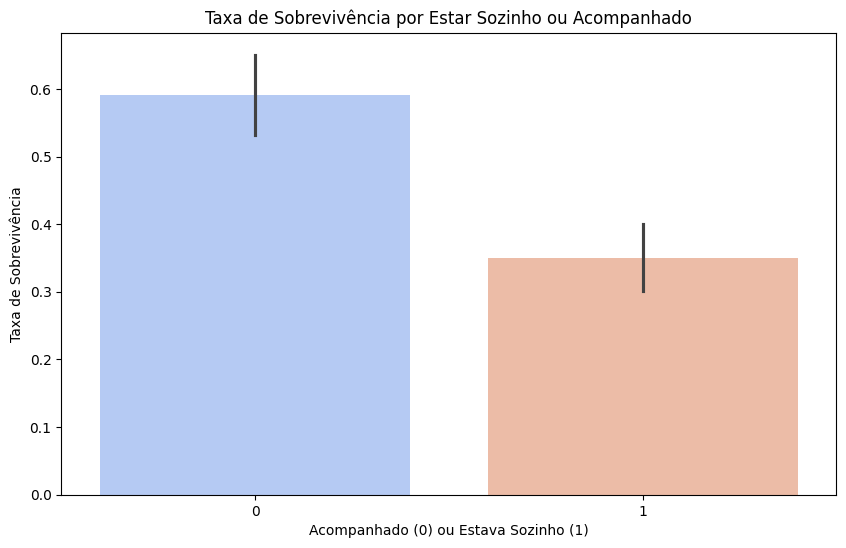

In [37]:
# Taxa de sobrevivência por se estava sozinho ou acompanhado
plt.figure(figsize=(10, 6))
sns.barplot(x='IsAlone', y='Survived', data=df, palette='coolwarm')
plt.title('Taxa de Sobrevivência por Estar Sozinho ou Acompanhado')
plt.ylabel('Taxa de Sobrevivência')
plt.xlabel('Acompanhado (0) ou Estava Sozinho (1)')
plt.show()


C:\Users\aluno8\AppData\Local\Temp\ipykernel_1360\845163030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IsMarried', y='Survived', data=df,palette='coolwarm')


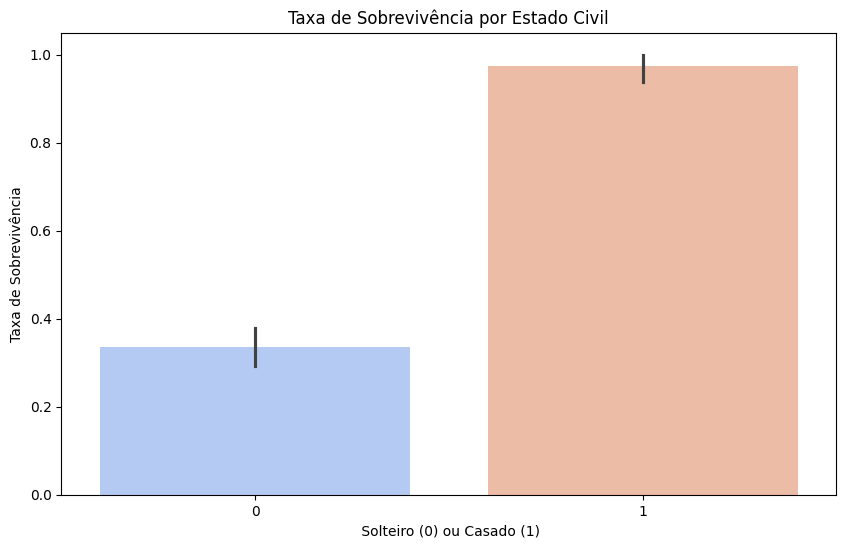

In [38]:
# Taxa de sobrevivência por sexo
plt.figure(figsize=(10, 6))
sns.barplot(x='IsMarried', y='Survived', data=df,palette='coolwarm')
plt.title('Taxa de Sobrevivência por Estado Civil')
plt.ylabel('Taxa de Sobrevivência')
plt.xlabel(' Solteiro (0) ou Casado (1)')
plt.show()

<Axes: >

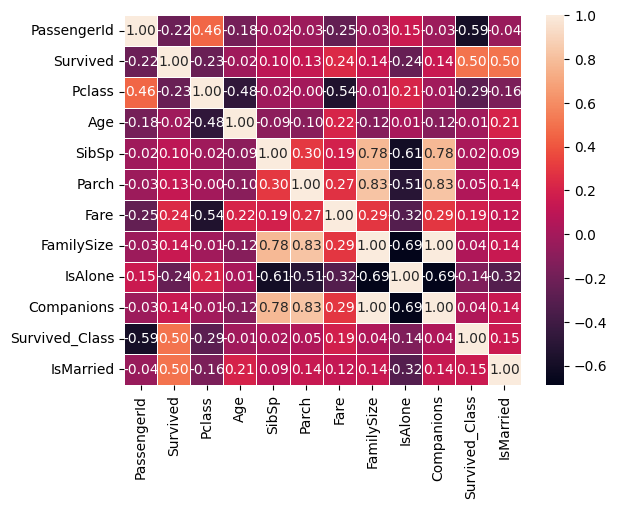

In [39]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True,fmt=".2f", linewidth=.5)



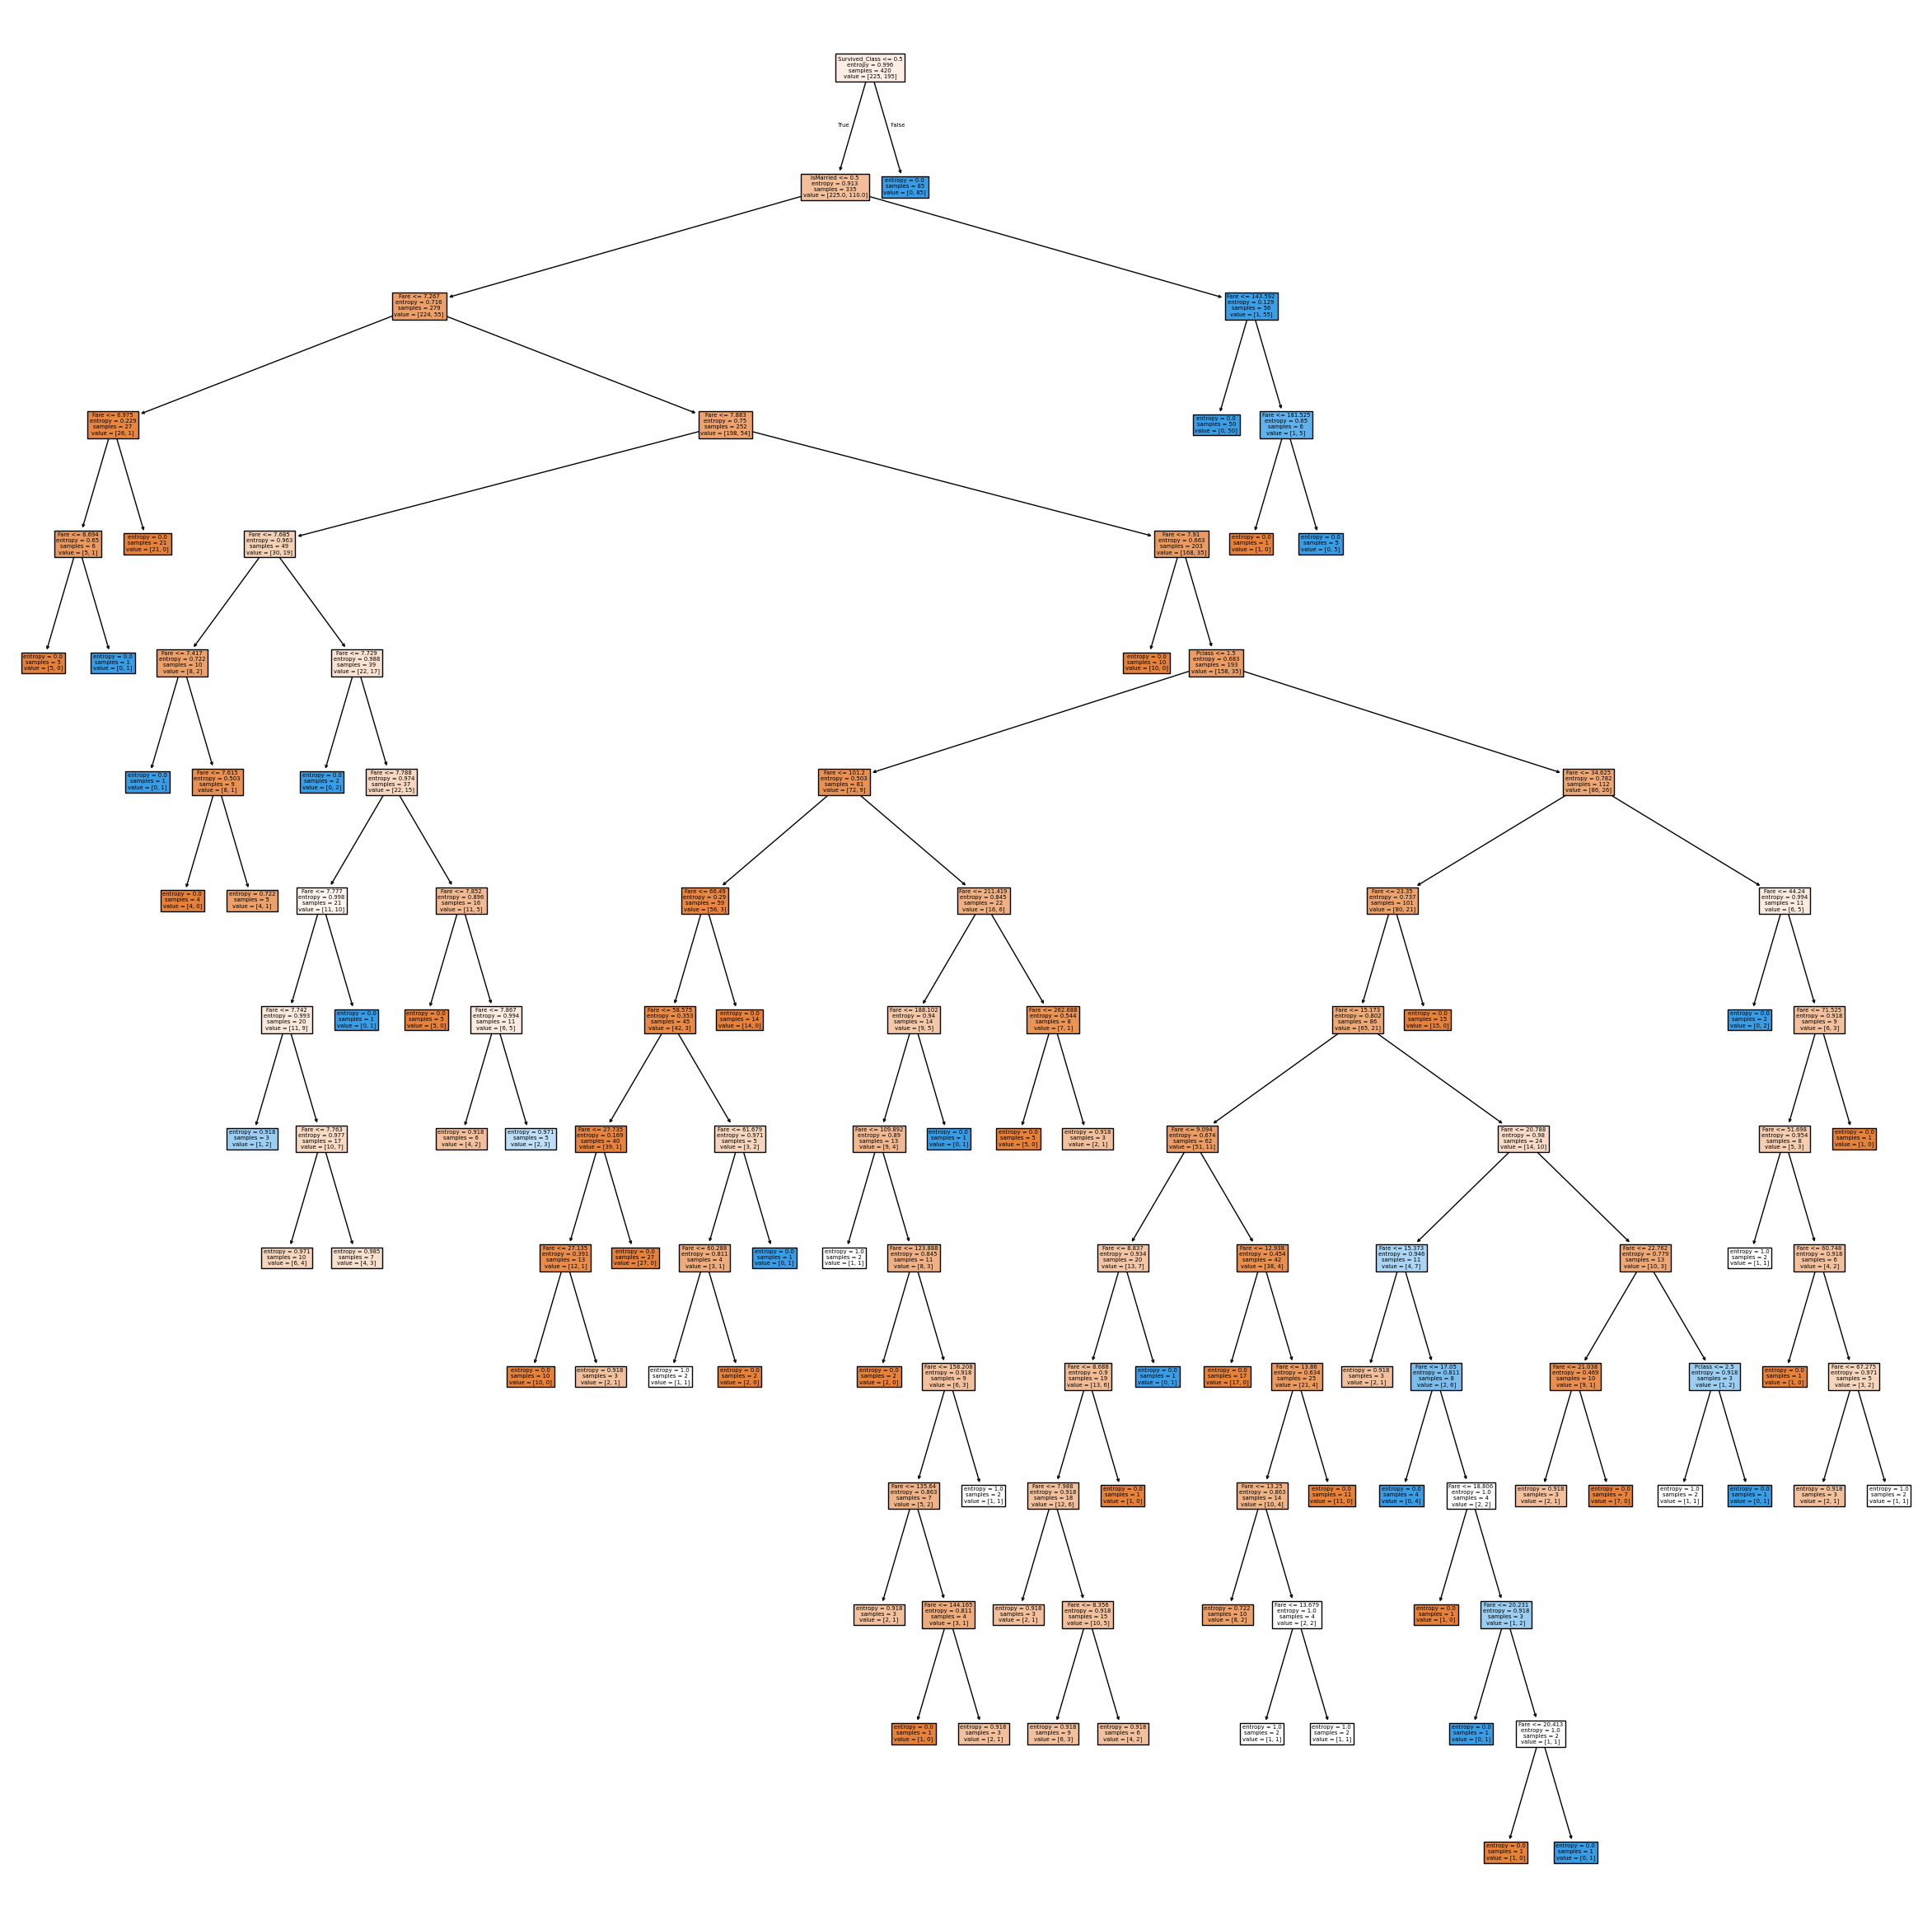

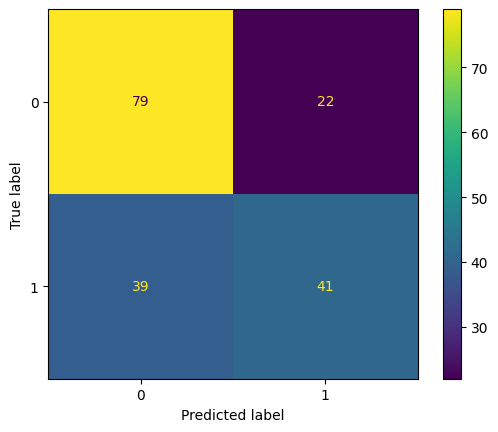

NameError: name 'metrics' is not defined

In [40]:
feature_cols = ['Survived_Class', 'IsMarried', 'Pclass', 'Fare']
X_train = df[feature_cols]
y_train = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

plt.figure(figsize=(30,30))
_ = tree.plot_tree(clf, feature_names=X_train.columns, filled=True)

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

count_misclassified = (y_test != y_pred).sum()
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Acuracia: {:.2f}'.format(accuracy))


In [24]:
print(df[feature_cols].isnull().sum())
print(len(X_train), len(y_train))
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)



Survived_Class    0
IsMarried         0
Pclass            0
Fare              0
dtype: int64
420 420


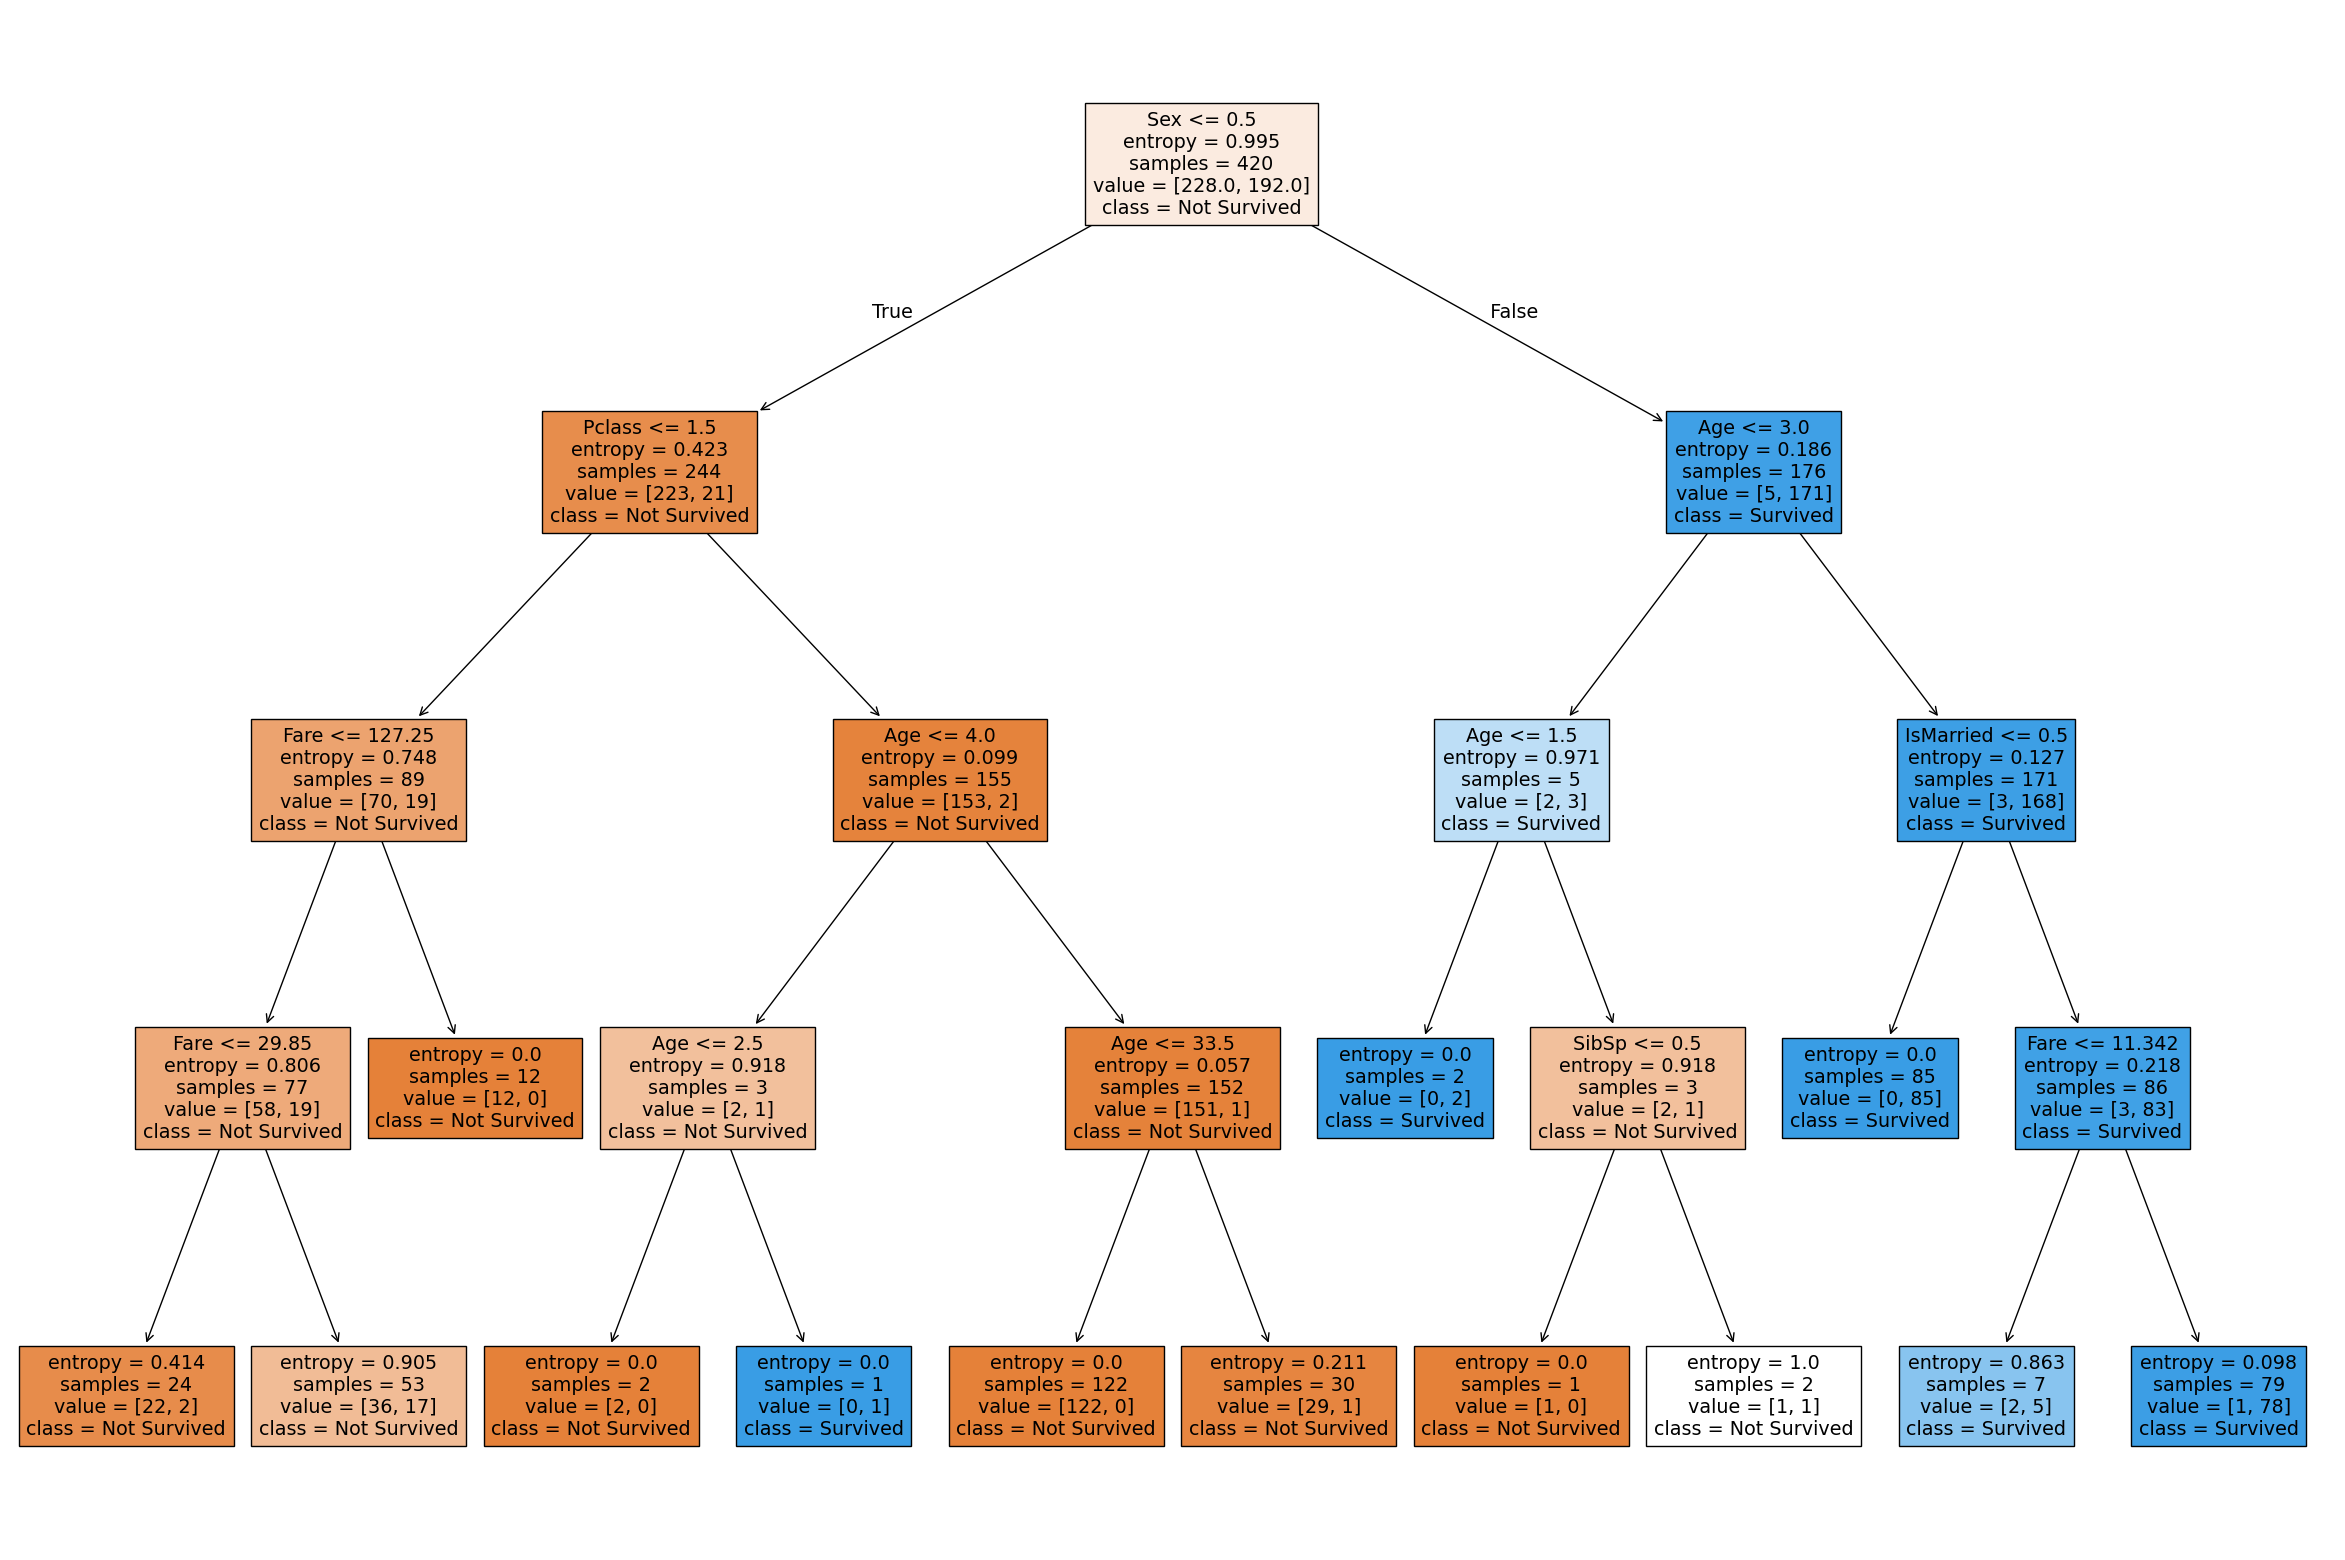

0.8784530386740331

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
df = pd.read_csv(r"D:\4 SEMESTRE\IA\aula\titanic_detailed.csv",sep=",")
# Selecionando as colunas que serão usadas no modelo
# Removendo colunas desnecessárias e aquelas que podem ter muitos valores nulos
columns_to_use = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                  'FamilySize', 'IsAlone', 'IsMarried']

# Convertendo colunas categóricas para numéricas (Sex, Embarked)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Removendo linhas com valores nulos nas colunas selecionadas
data_clean = df[columns_to_use + ['Survived']].dropna()

# Dividindo o conjunto de dados em variáveis dependentes e independentes
X = data_clean[columns_to_use]
y = data_clean['Survived']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando o modelo de árvore de decisão
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=42)
decision_tree.fit(X_train, y_train)

# Realizando previsões
y_pred = decision_tree.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)

# Visualizando a árvore de decisão
plt.figure(figsize=(30,20))
tree.plot_tree(decision_tree, feature_names=columns_to_use, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

accuracy


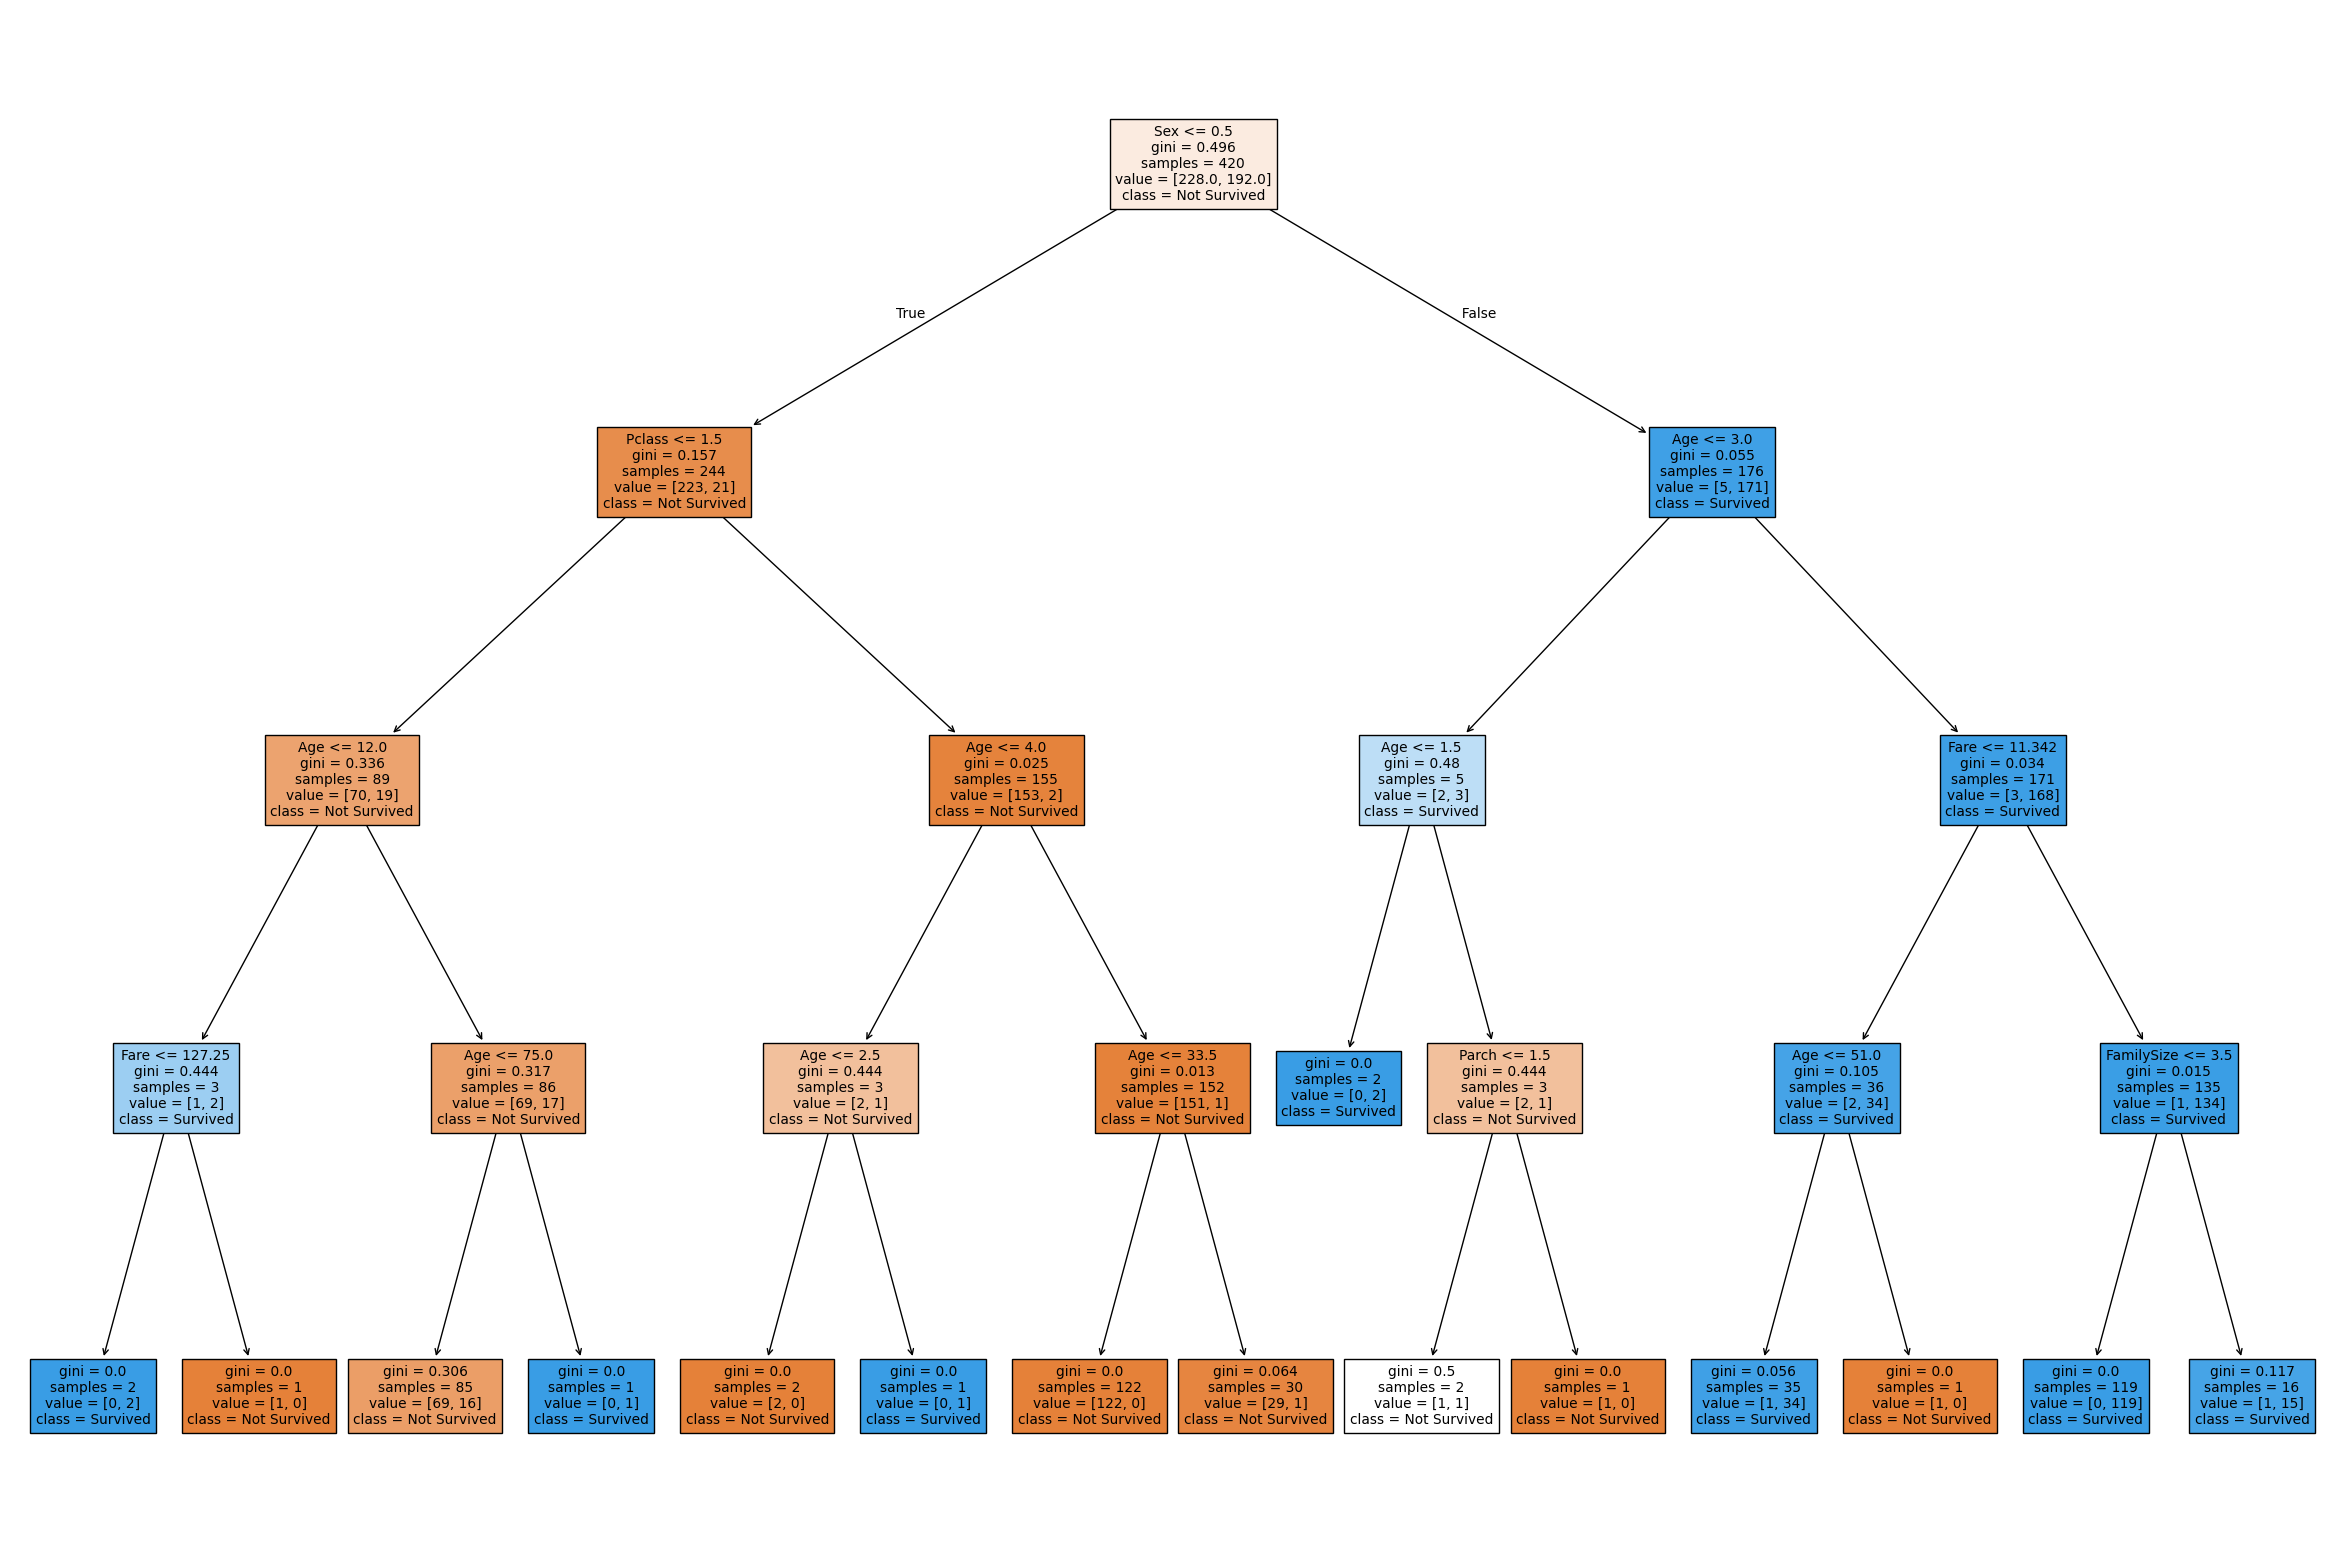

0.8784530386740331

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
df = pd.read_csv(r"D:\4 SEMESTRE\IA\aula\titanic_detailed.csv",sep=",")
# Selecionando as colunas que serão usadas no modelo
# Removendo colunas desnecessárias e aquelas que podem ter muitos valores nulos
columns_to_use = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                  'FamilySize', 'IsAlone', 'IsMarried']

# Convertendo colunas categóricas para numéricas (Sex, Embarked)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Removendo linhas com valores nulos nas colunas selecionadas
data_clean = df[columns_to_use + ['Survived']].dropna()

# Dividindo o conjunto de dados em variáveis dependentes e independentes
X = data_clean[columns_to_use]
y = data_clean['Survived']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando o modelo de árvore de decisão
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree.fit(X_train, y_train)

# Realizando previsões
y_pred = decision_tree.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)

# Visualizando a árvore de decisão
plt.figure(figsize=(30,20))
tree.plot_tree(decision_tree, feature_names=columns_to_use, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

accuracy


In [48]:
from sklearn import metrics
count_misclassified = (y_test != y_pred).sum()
print('Amostras erroneamente classificadas: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Acuracia: {:.2f}'.format(accuracy))

Amostras erroneamente classificadas: 22
Acuracia: 0.88
